# Project 9

In the coding project below, answer any bolded questions on Canvas via the assigment named Programming Project 9 Quiz Questions.

Please follow the instructions below (e.g., setting random state values) to ensure that your answers match the solutions.

In this assignment, we will be using PennGrader, a Python package built by a former TA for autograding Python notebooks. PennGrader was developed to provide students with instant feedback on their answer. You can submit your answer and know whether it's right or wrong instantly. We then record your most recent answer in our backend database. You will have 100 attempts per test case, which should be more than sufficient.

<b>NOTE：Please remember to remove the </b>

```python
raise notImplementedError
```
<b>after your implementation, otherwise the cell will not compile.</b>

You currently work for a company that offers a subscription-based music streaming service. After an unsuccessful round of marketing efforts with low return on investments, your company is exploring other strategies to promote its services. Currently, its advertising strategy has been to bid on a set of keywords that someone on the marketing team put together, but the team has realized that they could improve on this strategy by refining the keywords based on different customer personas. Therefore, the company has asked you to help it identify a set of user segments so that the ads can be more customized. 

For this task, you have been provided with the Music data which contains sociodemographic and music preference data on 4,914 users and your goal is to identify clusters of users based on this information.

| Column | Description |
|:-|:-|
| Age | Age of the user |
| Gender | Gender of the user |
| Employment status | Employment status of the user |
| Annual income | Annual income of the user in USD |
| Usage per month | Average usage per month of the user measured in minutes |
| Top genre | The genre of music that is most streamed by the user |
| Num of days active | The number of days in the last 365 days that the user used the service |



## Getting Set Up
Meet our old friend - PennGrader! Fill in the cell below with your PennID and then run the following cell to initialize the grader.

<font color='red'>Warning:</font> Please make sure you only have one copy of the student notebook in your directory in Codio upon submission. The autograder looks for the variable `STUDENT_ID` across all notebooks, so if there is a duplicate notebook, it will fail.

In [1]:
#PLEASE ENSURE YOUR STUDENT_ID IS ENTERED AS AN INT (NOT A STRING). IF NOT, THE AUTOGRADER WON'T KNOW WHO 
#TO ASSIGN POINTS TO YOU IN OUR BACKEND

STUDENT_ID = 42294124                   # YOUR 8-DIGIT PENNID GOES HERE
STUDENT_NAME = "Katrina Shih"     # YOUR FULL NAME GOES HERE

In [2]:
import penngrader.grader

grader = penngrader.grader.PennGrader(homework_id = 'ESE542_Online_Su_2021_HW9', student_id = STUDENT_ID)

In [56]:
# Let's import the relevant Python packages here
# Feel free to import any other packages for this project

#Data Wrangling
import pandas as pd
import numpy as np

import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from io import StringIO

## Part A: Data Cleaning

Throughout this course, you have mostly been provided with relatively clean datasets but in the real world, data is usually a lot messier. This could be caused by data logging errors, bugs in the pipeline or even erroneous human input in surveys. Some common approaches of dealing with these observations are by dropping them, replacing the erroneous values with the mean/median, winsorizing, etc. Here, we will just drop them. 

1. Load the Music data and drop any rows with `NaN/null` values. Assign the dataframe to the variable `music`.

In [5]:
# Load the data from a CSV file
music = pd.read_csv('music.csv')  # Replace 'path_to_your_data.csv' with the actual path to your dataset

# Drop rows with any NaN/null values
music.dropna(inplace=True)

# Show the first few rows to verify
print(music.head())

   age  gender   employment_status  annual_income  usage_per_month top_genre  \
0   20    Male  Employed full-time         115000              847      Rock   
1   22    Male  Employed full-time          42100              256      Rock   
2   18    Male  Employed full-time         114750             1232   Country   
3   19  Female  Employed full-time         118250             2310      Rock   
4   33    Male  Employed full-time         111450              568       Pop   

   num_of_days_active  
0                 210  
1                 222  
2                 161  
3                 176  
4                 185  


In [6]:
grader.grade(test_case_id = 'test_read_music', answer = music.shape)

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


2. Plot bar charts and histograms of the data to visualize the distributions. Does anything seem unusual? Good to think about: can you encapsulate plotting data into a function?

    - Are there more male or female users? Store your answer in `male_or_female` ('M'/'F').
    - Which genre is the most popular among users? Store your answer in `pop_genre`.
    - How many users are students? Store you answer in `student_num`.

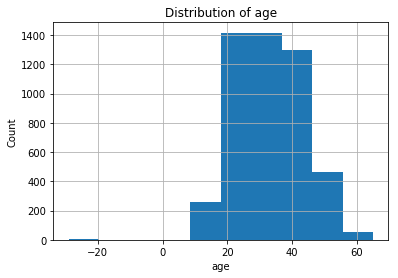

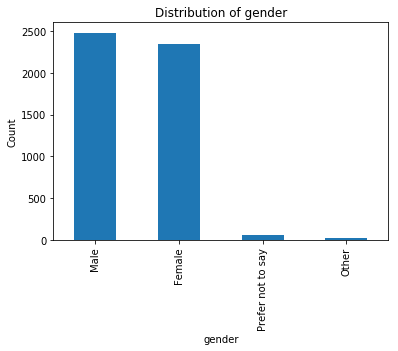

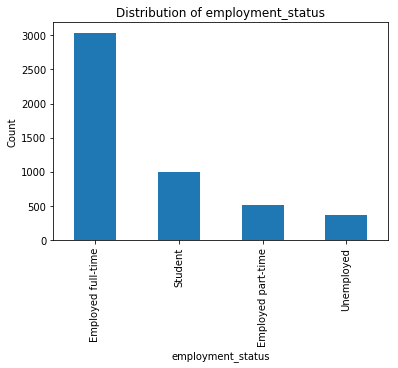

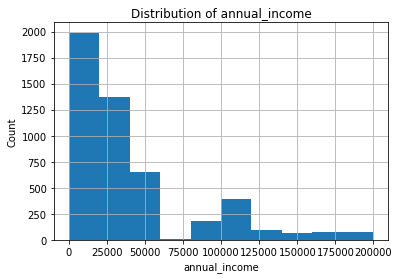

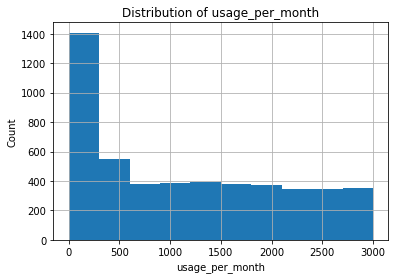

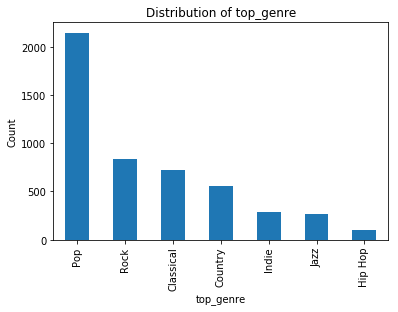

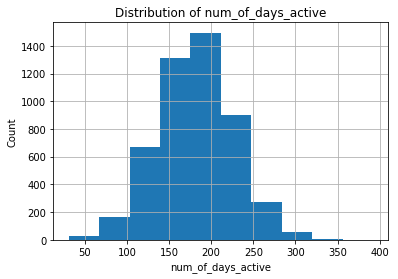

In [15]:
# Plotting function
def plot_data(df, column):
    """Plot histograms for numerical data and bar charts for categorical data."""
    if df[column].dtype == 'object' or column == 'gender':
        # It's a categorical variable
        df[column].value_counts().plot(kind='bar')
    else:
        # It's a numerical variable
        df[column].hist()
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

# Visualize each column
for col in music.columns:
    plot_data(music, col)

In [16]:
male_or_female = 'M' if music['gender'].value_counts()['Male'] > music['gender'].value_counts()['Female'] else 'F'

In [17]:
grader.grade(test_case_id = 'test_visual1', answer = male_or_female)

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [18]:
pop_genre = music['top_genre'].value_counts().idxmax()

In [19]:
grader.grade(test_case_id = 'test_visual2', answer = pop_genre)

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [20]:
student_num = music[music['employment_status'] == 'Student'].shape[0]


print(f"More males or females: {male_or_female}")
print(f"Most popular genre: {pop_genre}")
print(f"Number of students: {student_num}")

More males or females: M
Most popular genre: Pop
Number of students: 1000


In [21]:
grader.grade(test_case_id = 'test_visual3', answer = student_num)

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


3. Take a closer look at ‘age’ and ‘num of days active’. Does anything look peculiar? Store the number of invalid 'age' in `bad_age_num`, invalid number of 'num of days active' in `bad_active_num`. Drop these rows and also assign the new dataframe to the variable `music`. *Hint*: Recall the values that age and number of days active can take on.

In [22]:
# Enter your code here
#bad_age_num = 

bad_age_num = music[(music['age'] < 10) | (music['age'] > 100)].shape[0]

In [23]:
grader.grade(test_case_id = 'test_drop1', answer = bad_age_num)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [24]:
# Enter your code here
#bad_active_num = 

bad_active_num = music[(music['num_of_days_active'] < 0) | (music['num_of_days_active'] > 365)].shape[0]


In [25]:
grader.grade(test_case_id = 'test_drop2', answer = bad_active_num)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [28]:
# Drop rows with invalid entries in-place
# drop based on age
music = music[(music['age'] >= 10) & (music['age'] <= 100)]
# drop based on numbers of days active
music = music[(music['num_of_days_active'] >= 0) & (music['num_of_days_active'] <= 365)]

# Print the numbers of invalid entries
print(f"Number of invalid ages: {bad_age_num}")
print(f"Number of invalid num of days active: {bad_active_num}")

# Display the cleaned DataFrame
print(music)

Number of invalid ages: 5
Number of invalid num of days active: 2
      age  gender   employment_status  annual_income  usage_per_month  \
0      20    Male  Employed full-time         115000              847   
1      22    Male  Employed full-time          42100              256   
2      18    Male  Employed full-time         114750             1232   
3      19  Female  Employed full-time         118250             2310   
4      33    Male  Employed full-time         111450              568   
...   ...     ...                 ...            ...              ...   
4909   31  Female          Unemployed          17150             1291   
4910   41    Male  Employed full-time          19150              905   
4911   37    Male  Employed full-time          39000              535   
4912   43  Female             Student         138800               13   
4913   44    Male  Employed full-time          27000             1184   

     top_genre  num_of_days_active  
0         Rock      

In [27]:
grader.grade(test_case_id = 'test_drop3', answer = music.shape)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## Part B: Clustering

Use K-means clustering to find a set of user groups using the following features as inputs: ‘age’, ‘annual income’, ‘usage per month’ and ‘number of days active’.

1. Standardize the data. *Hint*: `sklearn.preprocessing.scale` may be helpful. 

In [30]:
#X_scaled = 

features = music[['age', 'annual_income', 'usage_per_month', 'num_of_days_active']]

X_scaled = scale(features)
print(X_scaled)

[[-1.26120736  1.70825627 -0.32086458  0.62887233]
 [-1.06361331  0.02875876 -0.94875035  0.89592062]
 [-1.45880141  1.70249667  0.08816421 -0.46157486]
 ...
 [ 0.41834209 -0.0426602  -0.65233727  0.47309416]
 [ 1.01112424  2.25656958 -1.20691657 -1.24046571]
 [ 1.10992127 -0.31912069  0.03716841  1.07395282]]


In [31]:
grader.grade(test_case_id = 'test_scale', answer = X_scaled)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


2. Calculate the sum of squared distances of observations to their closest cluster center for $K\in [1,10]$ and add these values to a list called `ssd`. Use the default hyperparameters and set `random_state=42`. Store the minimum value of ssd in `min_ssd`. Comment on your thoughts: shall we choose the model with minimum ssd?

*Hint*: You may want to write a for-loop and refer to the [`sklearn.cluster.KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) documentation (read through the Attributes section).

In [33]:
# Enter your code here
#ssd = []
#min_ssd = 

ssd = []

# Calculate SSD for K = 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    ssd.append(kmeans.inertia_)  # Inertia: Sum of squared distances of samples to their closest cluster center

# Determine the minimum SSD
min_ssd = min(ssd)

# Print results
print("SSD for K=1 to 10:", ssd)
print("Minimum SSD:", min_ssd)

SSD for K=1 to 10: [19628.000000000004, 15280.264777566386, 12078.349976625346, 10201.534279457741, 8889.451085738281, 8019.866132430931, 7371.968329973683, 6770.424975377445, 6323.627120012206, 6009.299178632489]
Minimum SSD: 6009.299178632489


In [34]:
grader.grade(test_case_id = 'test_min_ssd', answer = min_ssd)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


3. Plot the values in `ssd` against the number of clusters, $K$ for $K\in[1,10]$. 

Length of SSD list: 10


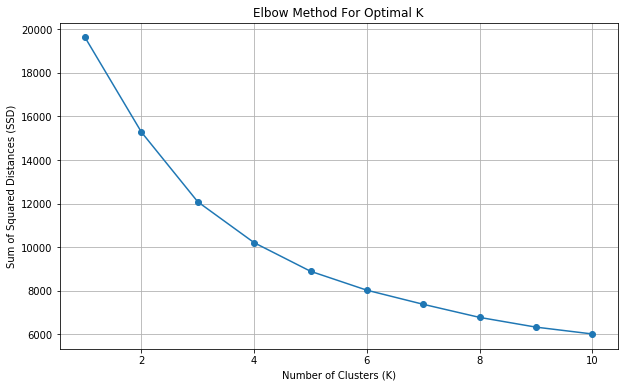

In [39]:
# Plot your ssd here
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    ssd.append(kmeans.inertia_)
    
# Ensure the list now has the correct number of elements
print("Length of SSD list:", len(ssd))

# Plot the results
if len(ssd) == 10:
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), ssd, marker='o')
    plt.title('Elbow Method For Optimal K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Sum of Squared Distances (SSD)')
    plt.grid(True)
    plt.show()
else:
    print("Error: The SSD list still contains an incorrect number of elements. Please check your loop logic.")

4. Based on this plot, what is the best number of clusters to set using the Elbow Method? The Elbow Method is the point where diminishing returns are no longer worth the additional cost. It will be the point before which the later points taper off or increase by very little. (More information on the Elbow Method can be found [here](https://en.wikipedia.org/wiki/Elbow_method_(clustering)#:~:text=In\%20cluster\%20analysis\%2C\%20the\%20elbow,number\%20of\%20clusters\%20to\%20use). Assign this value to the variable `optimal_K` (There might be multiple optimal k values, just enter one of those).

In [42]:
optimal_K = 4

In [43]:
grader.grade(test_case_id = 'test_best_K', answer = optimal_K)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


6. Retrain the K-means clustering algorithm with `n_clusters=optimal_K`. This will be your final model. Name your model `best_kmeans` and set `random_state=42`.

In [45]:
#best_kmeans =
best_kmeans = KMeans(n_clusters=optimal_K, random_state=42)
best_kmeans.fit(X_scaled)

# Cluster centers
print("Cluster Centers:")
print(best_kmeans.cluster_centers_)

# Labels for each point
print("Labels for each data point:")
print(best_kmeans.labels_)

Cluster Centers:
[[-0.91375624 -0.41633786 -0.76956617 -0.02012181]
 [ 0.44565656  1.94340354  0.23182362 -0.0122792 ]
 [ 0.92174432 -0.39336262 -0.46670379 -0.05454578]
 [-0.0521271  -0.40895283  1.17937411  0.08120333]]
Labels for each data point:
[1 0 1 ... 2 1 2]


In [46]:
grader.grade(test_case_id = 'test_best_model', answer = (optimal_K, best_kmeans.cluster_centers_))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## Part C: Visualizing

As a data scientist, it is important to be able to translate your findings to colleagues who may not have the same level of technical knowledge as you do; visualizations help a lot! Therefore, you have decided to plot the clusters. However, since there are four dimensions that you want to plot – age, annual income, usage per month and number of days active – you will need to utilize dimensionality reduction techniques to be able to plot this on a 2-D plane.

1. Train another K-means model using the following features as inputs: `age`, `annual income`,
`usage per month` and `number of days active`. Fit your model on `X_scaled`, name your predicted result as `pred`. Use `n_clusters=2` and `random_state=42`. 

In [47]:
# Enter your code here
# Setting up the K-means model with 2 clusters as instructed
kmeans_model = KMeans(n_clusters=2, random_state=42)
kmeans_model.fit(X_scaled)

# Storing the predictions in 'pred'
pred = kmeans_model.predict(X_scaled)

# Output the predictions to verify
print(pred)

[0 0 0 ... 0 1 1]


In [48]:
grader.grade(test_case_id = 'test_kmeans_plot', answer = pred)

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


2. Find the first <b>two</b> principal components of the scaled data and save the new data to variable `X_reduced`. Name your model `pca`.

*Hint*: Use `sklearn.decomposition.PCA` with `random_state=42`.

In [54]:
#pca =
pca = PCA(n_components=2, random_state=42)

X_reduced = pca.fit_transform(X_scaled)
print(X_reduced)

[[ 0.02451336  0.41629098]
 [-1.09975433  0.83009016]
 [ 0.03565931 -0.5768578 ]
 ...
 [-0.06659287  0.34744777]
 [ 1.19132401 -1.7933613 ]
 [ 0.62249979  1.01145131]]


In [55]:
grader.grade(test_case_id = 'test_pca', answer = (pca.n_features_, pca.n_components_))

Correct! You earned 1.0/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


3. Plot a scatterplot with the $1^{st}$ principal component on the $x$-axis and the $2^{nd}$ principal component on the $y$-axis. Color each point by the cluster that it is in from (1). Comment on yout observations.

*Hint*: Check out `seaborn.FacetGrid`. To use it, you will need your principle components and predicted clusters in one dataframe.

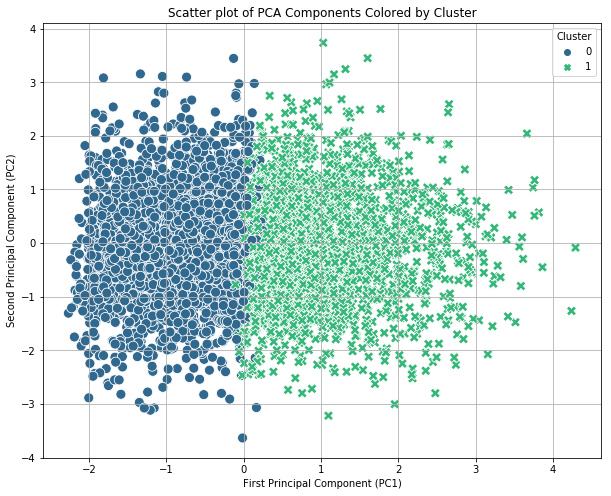

In [57]:
# Enter your code here

pca_df = pd.DataFrame(data=X_reduced, columns=['PC1', 'PC2'])

pca_df['Cluster'] = pred

# Plot using seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', style='Cluster', s=100)
plt.title('Scatter plot of PCA Components Colored by Cluster')
plt.xlabel('First Principal Component (PC1)')
plt.ylabel('Second Principal Component (PC2)')
plt.legend(title='Cluster', loc='best')
plt.grid(True)
plt.show()